In [1]:
import numpy as np
import matplotlib.pyplot as plt

hg_arr = np.load('./hg38-32vec.npy')
sg_arr = np.load('extracted_test-32vec.npy')

In [2]:
print(hg_arr)
print(hg_arr.shape)
print(sg_arr)
print(sg_arr.shape)

[123361491  91851269  51794880 109089715  90778310  79883465  44562915
 102125501  52187664  44787786  14896267  49173694 109047611 100827663
  49791378 135901695 124280274  79775293  89523320 137892662  79969777
 103329108  90453448 122538279  90209404  90943992  92347451 101874218
 137012075 121519984 103773124 233809625]
(32,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
(32,)


In [1]:
import numpy as np
from CalcMRate2 import CalcMRate

c = CalcMRate("./bed_data/test.bed", "./fasta_data/hg38.fa", "./extraction_dir", "extracted_test", np.random.rand(96))

In [2]:
out = c.get_spec32()

GENERATION OF 32-vec DESCRIPTOR | EXTRACTED SEQUENCES


100%|█████████████████████████████████████████████████████████████████████████████████████████████| 1737/1737 [00:00<00:00, 6464.60it/s]


In [3]:
print(out[0])
print(out[1])

['ACA', 'ACC', 'ACG', 'ACT', 'CCA', 'CCC', 'CCG', 'CCT', 'GCA', 'GCC', 'GCG', 'GCT', 'TCA', 'TCC', 'TCG', 'TCT', 'ATA', 'ATC', 'ATG', 'ATT', 'CTA', 'CTC', 'CTG', 'CTT', 'GTA', 'GTC', 'GTG', 'GTT', 'TTA', 'TTC', 'TTG', 'TTT']
[8621, 8603, 5904, 8624, 8474, 7322, 6335, 9672, 5804, 6282, 3377, 6085, 8686, 9651, 5933, 10945, 5451, 5744, 6801, 6639, 5891, 9260, 9598, 10856, 6378, 9771, 7877, 7712, 6917, 10686, 7604, 11857]


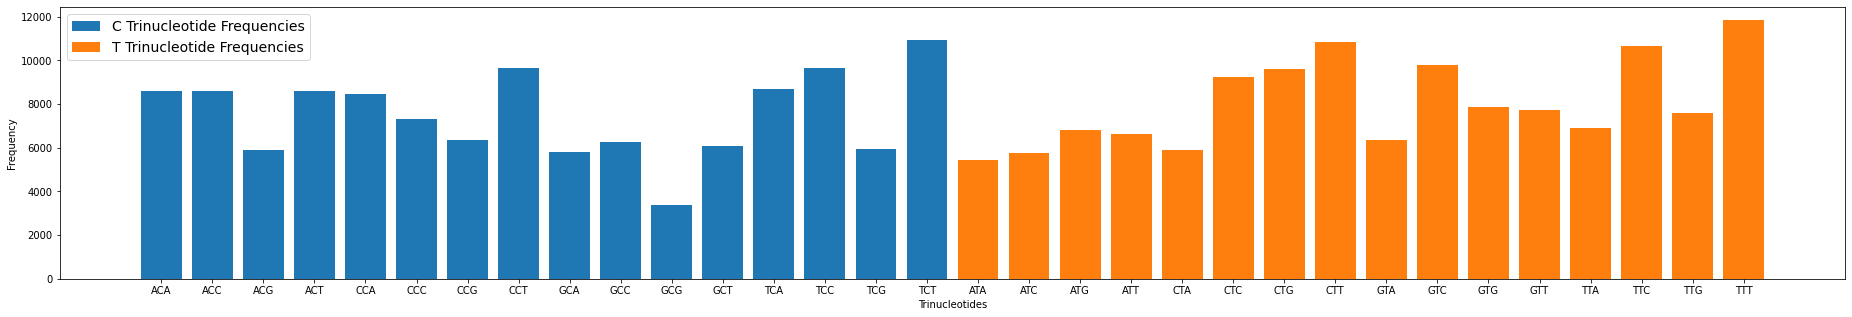

In [5]:
trinlist, counts = out
f, ax = plt.subplots(figsize=(32,5)) # set the size that you'd like (width, height)
plt.bar(trinlist[:16], counts[:16])
plt.bar(trinlist[16:], counts[16:])
plt.xlabel('Trinucleotides')
plt.ylabel('Frequency')
ax.legend(["C Trinucleotide Frequencies", "T Trinucleotide Frequencies"], fontsize = 14)

GENERATION OF 32-vec DESCRIPTOR | REFERENCE GENOME


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [1:21:06<00:00, 4866.80s/it]


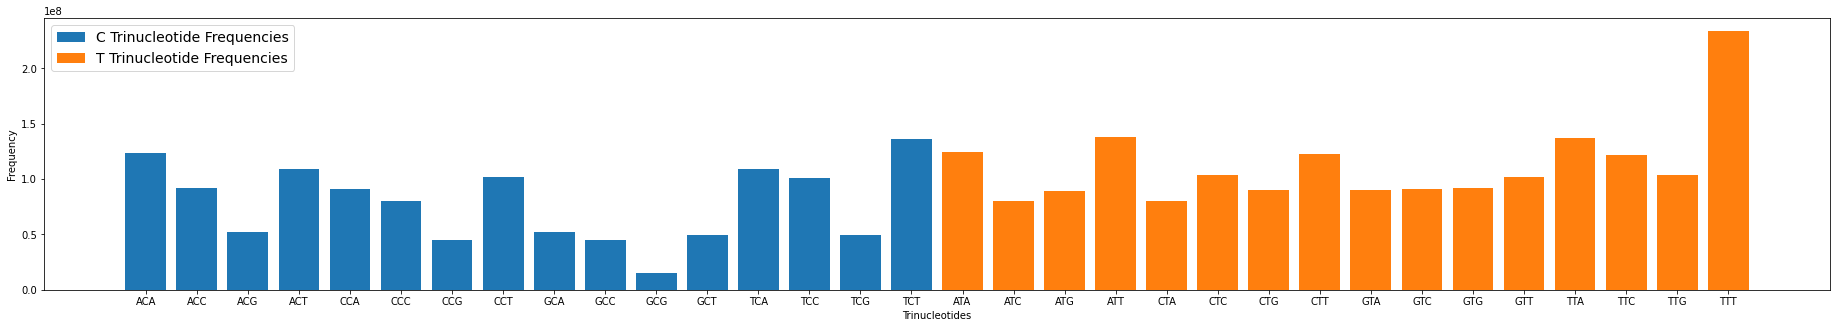

In [6]:
out2 = c.get_ref32()
trinlist_ref, counts_ref = out2

f, ax = plt.subplots(figsize=(32,5)) # set the size that you'd like (width, height)
plt.bar(trinlist_ref[:16], counts_ref[:16])
plt.bar(trinlist_ref[16:], counts_ref[16:])
plt.xlabel('Trinucleotides')
plt.ylabel('Frequency')
ax.legend(["C Trinucleotide Frequencies", "T Trinucleotide Frequencies"], fontsize = 14)

In [8]:
normalized_spec = counts/np.sum(counts)
normalized_ref = counts_ref/np.sum(counts_ref)

Text(0, 0.5, 'Normalized Specific Genome Frequency')

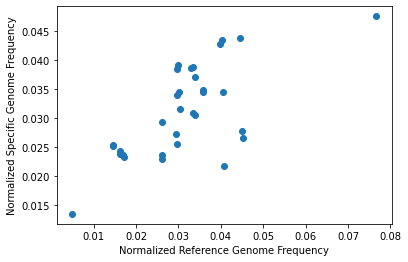

In [9]:
plt.scatter(normalized_ref, normalized_spec)
plt.xlabel('Normalized Reference Genome Frequency')
plt.ylabel('Normalized Specific Genome Frequency')

In [10]:
np.save('ref-32vec.npy', counts)

In [11]:
np.save('hg38-32vec.npy', counts_ref)